In [ ]:
# Q1: Use the MeanShift algorithm for image segmentation.
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

def my_meanShift(I, quantile=0.2, n_samples=500):

    # Flatten image.
    X = np.reshape(I, [-1, 3])

    bandwidth = estimate_bandwidth(X, quantile=quantile, n_samples=n_samples)
    print("Estimate Bandwidth: ", bandwidth)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)

    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))

    print("number of estimated clusters : %d" % n_clusters_)

    cluster_center_colors = cluster_centers.astype(int) / 255

    # Create a figure with two subplots
    fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))

    # Plot the labeled points
    for k, col in zip(range(n_clusters_), cluster_center_colors):
        my_members = labels == k
        ax1.plot(X[my_members, 0], X[my_members, 1], 'x', color=col)

    # Plot the cluster centers
    for k, col in zip(range(n_clusters_), cluster_center_colors):
        cluster_center = cluster_centers[k]
        ax1.plot(
            cluster_center[0],
            cluster_center[1],
            '*',
            markerfacecolor=col,
            markeredgecolor="k",
            markersize=14,
        )
        
    # Create a 3D plot
    fig2 = plt.figure(figsize=(5, 5))
    ax2 = fig2.add_subplot(projection='3d')

    # Plot the labeled points
    for k, col in zip(range(n_clusters_), cluster_center_colors):
        my_members = labels == k
        ax2.scatter(X[my_members, 0], X[my_members, 1], X[my_members, 2], color=col)

    # Plot the cluster centers
    for k, col in zip(range(n_clusters_), cluster_center_colors):
        cluster_center = cluster_centers[k]
        ax2.scatter(
            cluster_center[0],
            cluster_center[1],
            cluster_center[2],
            marker='*',
            color=col,
            s=200,
            edgecolors="k",
        )

    ax2.set_xlabel("R")
    ax2.set_ylabel("G")
    ax2.set_zlabel("Blue")

    ax2.set_title("Estimated number of clusters: %d" % n_clusters_)
    plt.show()

    # Replace segmented region colors by their cluster means
    for k in range(n_clusters_):
        # Find all pixels belonging to this cluster
        cluster_pixels = X[labels == k]
        # Compute the mean color of this cluster
        cluster_mean = np.mean(cluster_pixels, axis=0)
        # Replace all pixels in this cluster with the mean color
        X[labels == k] = cluster_mean

    # Reshape X back to the original image dimensions
    return np.reshape(X, I.shape)



In [ ]:
# MeanShift algorithm for Brains.png

# Read the image
I = cv2.imread("Brains.png")

# Convert to RGB colorspace
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Show the original image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(I)
axs[0].set_title("Original image")

# Preprocess the image using mathematical morphology
I = cv2.morphologyEx(I, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8), iterations=9)
X = cv2.morphologyEx(I, cv2.MORPH_TOPHAT, np.ones((5, 5), np.uint8), iterations=5)
I = I - X

# Show the preprocessed image
axs[1].imshow(I)
axs[1].set_title("Preprocessed image")
plt.show()

# Apply the MeanShift algorithm
segmented_image = my_meanShift(I, quantile=0.12, n_samples=500)

# Display segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image)
plt.title("Segmented image")
plt.show()


# Postprocess the image using mathematical morphology
segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8), iterations=5)

# Display segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image)
plt.title("MeanShift segmented image after postprocessing")
plt.show()

# Save the segmented image
plt.imsave("Brains_MeanShift.png", segmented_image)

In [ ]:
# MeanShift algorithm for Balloons.png

# Read the image
I = cv2.imread("Balloons.png")

# Convert to RGB colorspace
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Show the original image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(I)
axs[0].set_title("Original image")

# Preprocess the image using mathematical morphology
I = cv2.morphologyEx(I, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8), iterations=2)

# Show the preprocessed image
axs[1].imshow(I)
axs[1].set_title("Preprocessed image")
plt.show()

# Apply the MeanShift algorithm
segmented_image = my_meanShift(I, quantile=0.15, n_samples=500)

# Display segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image)
plt.title("Segmented image")
plt.show()


# Postprocess the image using mathematical morphology
segmented_image = segmented_image.astype(np.uint8)
segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8), iterations=3)
segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8), iterations=3)

# Display segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image)
plt.title("MeanShift segmented image after postprocessing")
plt.show()

# Save the segmented image
plt.imsave("Balloons_MeanShift.png", segmented_image)

In [ ]:
# MeanShift algorithm for Balls.png

# Read the image
I = cv2.imread("Balls.png")

# Convert to RGB colorspace
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Show the original image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(I)
axs[0].set_title("Original image")

# Preprocess the image using mathematical morphology
I = cv2.GaussianBlur(I, (11, 11), 0)
I = cv2.morphologyEx(I, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8), iterations=3)
I = cv2.morphologyEx(I, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8), iterations=5)

# Show the preprocessed image
axs[1].imshow(I)
axs[1].set_title("Preprocessed image")
plt.show()

# Apply the MeanShift algorithm
segmented_image = my_meanShift(I, quantile=0.1, n_samples=500)

# Display segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image)
plt.title("Segmented image")
plt.show()


# Postprocess the image using mathematical morphology
segmented_image = segmented_image.astype(np.uint8)
segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8), iterations=3)
segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8), iterations=3)

# Display segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image)
plt.title("MeanShift segmented image after postprocessing")
plt.show()

# Save the segmented image
plt.imsave("Balls_MeanShift.png", segmented_image)

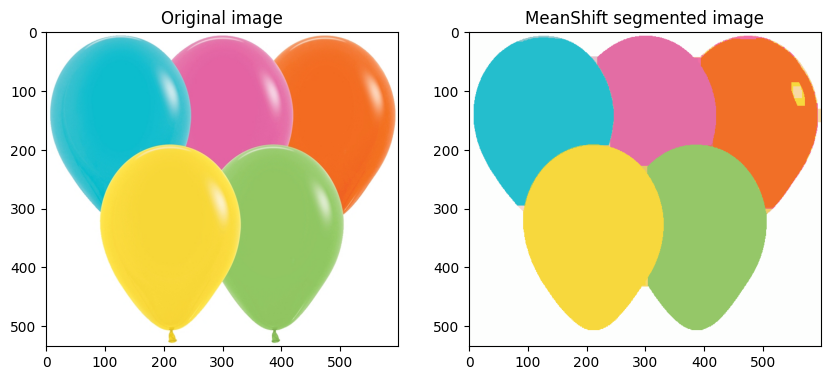

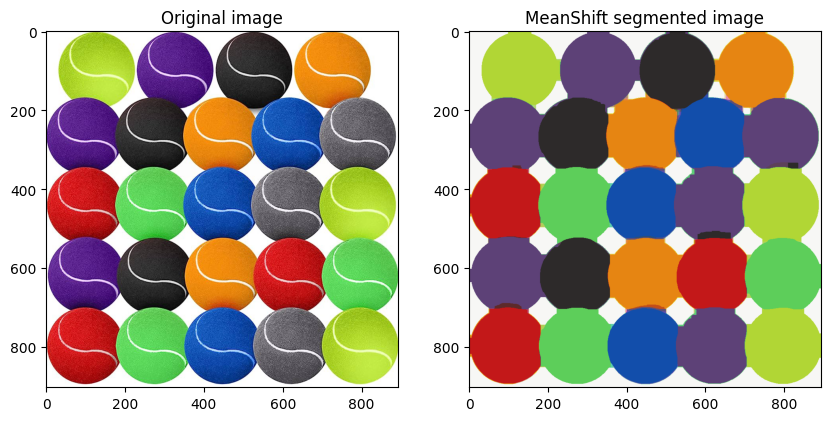

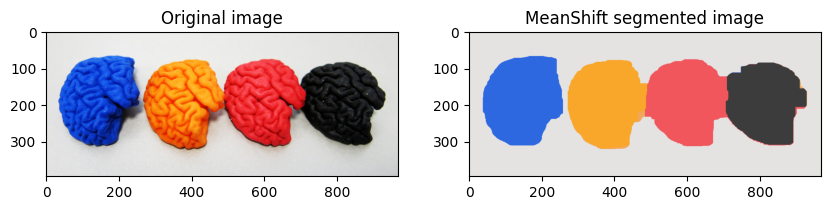

In [107]:
# Q1: display the original image and the segmented image
import cv2
import numpy as np
from matplotlib import pyplot as plt

# display the original image and the segmented image
for img in ["Balloons", "Balls", "Brains"]:
    I = cv2.imread(f"{img}.png")
    I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    
    # Load the segmented image
    I_seg = cv2.imread(f"{img}_MeanShift.png")
    I_seg = cv2.cvtColor(I_seg, cv2.COLOR_BGR2RGB)
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    # Plot the original image
    axs[0].imshow(I)
    axs[0].set_title("Original image")
    
    # Plot the segmented image
    axs[1].imshow(I_seg)
    axs[1].set_title("MeanShift segmented image")
    
    plt.show()

In [ ]:
# Q2: Use the Watershed algorithm for image segmentation.
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max


def my_watershed(I, threshold):
    # Convert the image to grayscale
    I_gray = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

    # Threshold the grayscale image to create a binary image
    _, I_binary = cv2.threshold(I_gray, threshold, 255, cv2.THRESH_BINARY_INV)

    # Display the binary image
    plt.imshow(I_binary, cmap="gray")
    plt.title(f"Binary image after thresholding {threshold}")
    plt.show()

    # Calculate the distance transform of the binary image
    distance = ndi.distance_transform_edt(I_binary)

    # Find the local maxima in the distance transform
    local_maxi = peak_local_max(distance, footprint=np.ones((3, 3)), labels=I_binary)

    # Generate the Watershed markers
    markers = ndi.label(local_maxi)[0]
    markers = cv2.resize(markers, (I_binary.shape[1], I_binary.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Perform Watershed on the image
    labels = watershed(-distance, markers, mask=I_binary)
    
    # show distance
    plt.imshow(distance)
    plt.title("Distance")

    return labels

In [ ]:
# Watershed algorithm for Brains.png

# Read the image
I = cv2.imread("Brains.png")

# Convert to RGB colorspace
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Show the original image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(I)
axs[0].set_title("Original image")

# Preprocess the image using mathematical morphology
I = cv2.GaussianBlur(I, (11, 11), 0)
I = cv2.morphologyEx(I, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8), iterations=7)

# Show the preprocessed image
axs[1].imshow(I)
axs[1].set_title("Preprocessed image")
plt.show()

# Apply the MeanShift algorithm
segmented_image = my_watershed(I, 175)

# Display segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image)
plt.title("Segmented image")
plt.show()

# Postprocess the image using mathematical morphology
segmented_image = segmented_image.astype(np.uint8)
segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8), iterations=3)

# Display segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image)
plt.title("MeanShift segmented image after postprocessing")
plt.show()

# Save the segmented image
plt.imsave("Brains_Watershed.png", segmented_image)

In [ ]:
# Watershed algorithm for Balloons.png

# Read the image
I = cv2.imread("Balloons.png")

# Convert to RGB colorspace
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Show the original image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(I)
axs[0].set_title("Original image")

# Preprocess the image using mathematical morphology
I = cv2.morphologyEx(I, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8), iterations=2)


# Show the preprocessed image
axs[1].imshow(I)
axs[1].set_title("Preprocessed image")
plt.show()

# Apply the MeanShift algorithm
segmented_image = my_watershed(I, 240)

# Display segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image)
plt.title("Segmented image")
plt.show()

# Postprocess the image using mathematical morphology
segmented_image = segmented_image.astype(np.uint8)

# Display segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image)
plt.title("MeanShift segmented image after postprocessing")
plt.show()

# Save the segmented image
plt.imsave("Balloons_Watershed.png", segmented_image)

In [ ]:
# Watershed algorithm for Balls.png

# Read the image
I = cv2.imread("Balls.png")

# Convert to RGB colorspace
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Show the original image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(I)
axs[0].set_title("Original image")

# Preprocess the image using mathematical morphology
I = cv2.GaussianBlur(I, (11, 11), 0)

# Show the preprocessed image
axs[1].imshow(I)
axs[1].set_title("Preprocessed image")
plt.show()

# Apply the MeanShift algorithm
segmented_image = my_watershed(I, 240)

# Display segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image)
plt.title("Segmented image")
plt.show()

# Postprocess the image using mathematical morphology
segmented_image = segmented_image.astype(np.uint8)
segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8), iterations=3)

# Display segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image)
plt.title("MeanShift segmented image after postprocessing")
plt.show()

# Save the segmented image
plt.imsave("Balls_Watershed.png", segmented_image)

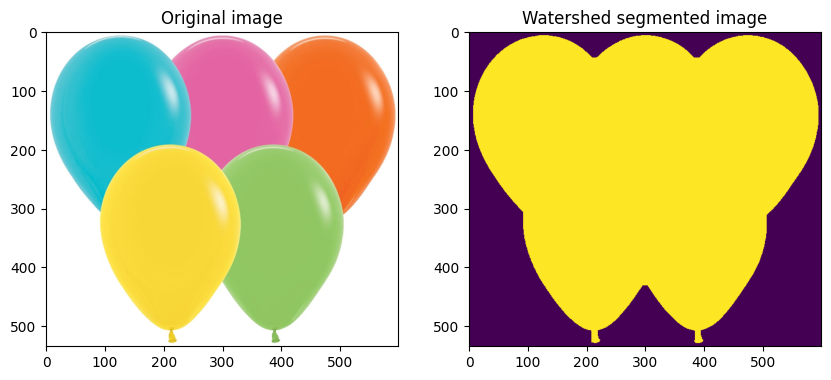

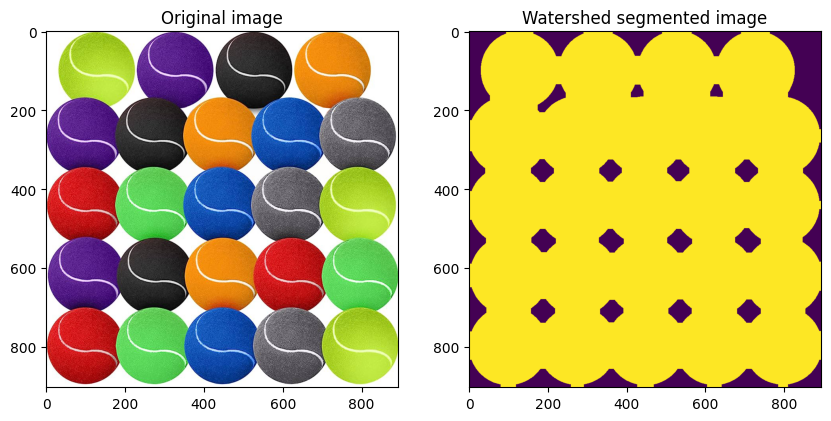

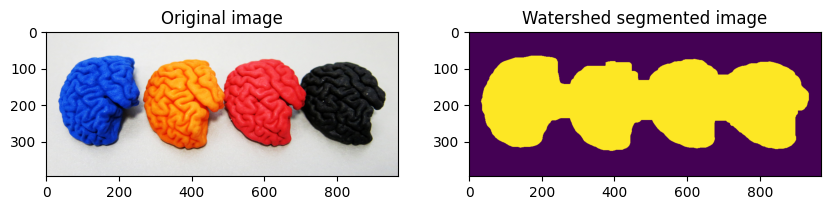

In [106]:
# Q2: display the original image and the segmented image
import cv2
import numpy as np
from matplotlib import pyplot as plt

# display the original image and the segmented image
for img in ["Balloons", "Balls", "Brains"]:
    I = cv2.imread(f"{img}.png")
    I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    
    # Load the segmented image
    I_seg = cv2.imread(f"{img}_Watershed.png")
    I_seg = cv2.cvtColor(I_seg, cv2.COLOR_BGR2RGB)
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    # Plot the original image
    axs[0].imshow(I)
    axs[0].set_title("Original image")
    
    # Plot the segmented image
    axs[1].imshow(I_seg)
    axs[1].set_title("Watershed segmented image")
    
    plt.show()

In [105]:
# Q3ab: Compare MeanShift and Watershed segmentation results.
from skimage import measure

def count_objects(segmented_image):
    # Convert the image to grayscale
    I_gray = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2GRAY)

    # Threshold the grayscale image to create a binary image
    _, I_binary = cv2.threshold(I_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    
    lables = measure.label(I_binary)
    
    
    return len(np.unique(lables)) - 1

print("MeanShift segmentation results:")

# Count the number of objects in the segmented images
for img in ["Balloons", "Balls", "Brains"]:
    # Load the segmented image
    I_seg = cv2.imread(f"{img}_MeanShift.png")
    
    # Count the number of objects in the segmented image
    num_objects = count_objects(I_seg)
    
    # Print the number of objects
    print(f"{img}: {num_objects} objects")
    
print("\nWatershed segmentation results:")
    
for img in ["Balloons", "Balls", "Brains"]:
    # Load the segmented image
    I_seg = cv2.imread(f"{img}_Watershed.png")
    
    # Count the number of objects in the segmented image
    num_objects = count_objects(I_seg)
    
    # Print the number of objects
    print(f"{img}: {num_objects} objects")

    


MeanShift segmentation results:
Balloons: 1 objects
Balls: 1 objects
Brains: 2 objects

Watershed segmentation results:
Balloons: 1 objects
Balls: 32 objects
Brains: 1 objects


| Image             | #Objects MeanShift | #Objects Watershed |
|------------------------|------------|---------|
| Balloons |      1      |    1      |
| Balls  |      1      |    32      |
| Brains  |      2      |    1      |


- For both types of objects, Balloons and Brains, the segmentation results are similar for both methods, and both are able to segment them correctly as one object. This may be due to the fact that balloons and balls are relatively simple in shape, distinct in color, and highly distinguishable from their backgrounds, so both methods are able to separate them effectively.

- However, the Watershed method performs better on balls, a class of objects. This may be due to the relatively uniform shape of the balls, less color variation, and the fact that there are certain gaps between the balls, which allows the Watershed method to more accurately identify the boundaries of the balls and segment them into separate objects.

- In summary, the Watershed method works better for ball segmentation when dealing with these specific objects, while the MeanShift method may have some limitations in ball segmentation. However, the selection of a suitable segmentation method also requires a combination of object shape, color characteristics and other factors, as well as further experiments and evaluations.
